In [3]:
import numpy as np
import holopy as hp
from holopy.core.io import get_example_data_path, load_average
from holopy.core.process import bg_correct
from holopy.scattering import calc_holo, Sphere

import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

In [4]:
import matplotlib as mpl


#axes.xaxis.set_tick_params(direction='in', which='both')
#axes.yaxis.set_tick_params(direction='in', which='both')
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 0.1
mpl.rcParams["figure.dpi"] = 130
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='medium')
rc('ytick', labelsize='medium')
def cm2inch(value):
    return value/2.54

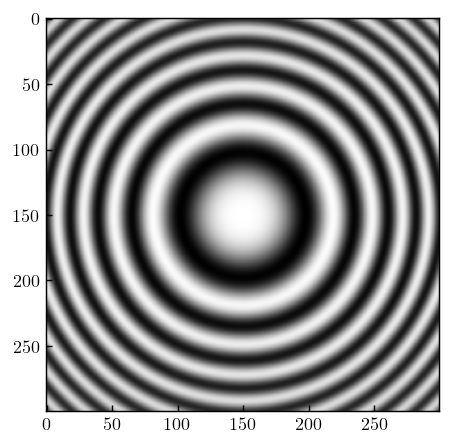

In [23]:
sphere = Sphere(n=1.59, r=0.1, center=(150*0.05, 150*0.05, 15))
# n is the optical index of the particle, r it's radius un microns
# center is its center position in pixel.

medium_index = 1.33
illum_wavelen = 0.532
illum_polarization = (1, 0)
detector = hp.detector_grid(shape=300, spacing=0.05)
# shape is the size in pixel of the camera
# spacing is the pixel's size

holo = calc_holo(
    detector, sphere, medium_index, illum_wavelen, illum_polarization,
)
#the hologram can be directly be plotted using:
plt.imshow(holo.data, cmap = "gray")

In [18]:
med_wavelen = holo.illum_wavelen / holo.medium_index
zstack = np.linspace(0, 50, 400)
rec_vol = hp.propagate(holo, zstack*med_wavelen, cfsp=3, illum_wavelen = 0.532, medium_index = 1.33)
#hp.show(rec_vol)

In [19]:
def radial_profile(data, center=None):
    if center==None:
        center = np.array(np.shape(data)) / 2
    
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    
    T = data.ravel()
    V = r.ravel()
    
    err = [np.std(T[V == u]) for u in np.unique(V)]
    
    return radialprofile, err

In [20]:
rads = []
for i in range(len(zstack)):
    rad = np.absolute(rec_vol.data[150,:,i])
    rads.append(rad)

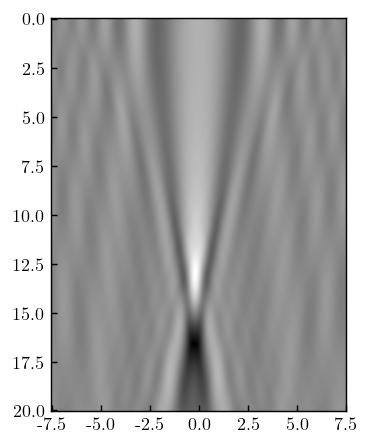

In [24]:
plt.imshow(rads, cmap = "gray")
ax = plt.gca()
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 399])
ax.set_yticklabels(np.round(zstack[[0, 50, 100, 150, 200, 250, 300, 350, 399]]*med_wavelen,1))
ax.set_xticks([0, 50, 100, 150, 200, 250, 300])
ax.set_xticklabels(np.array([0, 50, 100, 150, 200, 250, 300])*0.05 - 150*0.05)


plt.show()

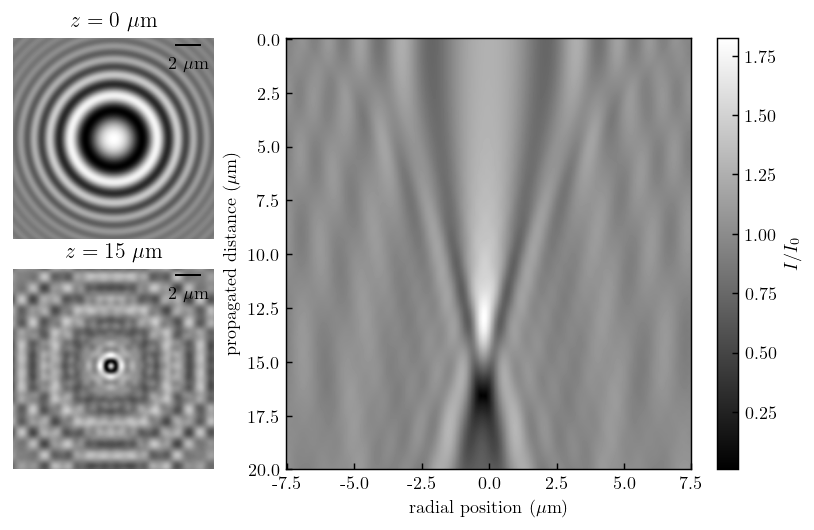

In [25]:
fig = plt.figure(figsize=(cm2inch(16), cm2inch(10)),constrained_layout=False)
gs = fig.add_gridspec(2,3)

fig.add_subplot(gs[0,0])

plt.imshow(np.absolute(rec_vol.data[:,:,0]), cmap = 'gray', )
plt.title("$z_{} = 0 ~\mathrm{\mu m}$")
ax = plt.gca()
scalebar = ScaleBar(0.05, "um", length_fraction=0.25, frameon=False, color="black")
ax.add_artist(scalebar)
plt.axis("off")

###

fig.add_subplot(gs[1,0])
plt.title("$z = 15~ \mathrm{\mu m}$")

plt.imshow(np.absolute(rec_vol.data[:,:,300]), cmap = 'gray')
ax = plt.gca()
scalebar = ScaleBar(0.05, "um", length_fraction=0.25,frameon=False, color="black")
ax.add_artist(scalebar)
plt.axis("off")
###

fig.add_subplot(gs[0:,1:])


pos = plt.imshow(rads, cmap = "gray", aspect="auto")
plt.xlabel("radial position ($\mathrm{\mu m}$)", fontsize="medium")
plt.ylabel("propagated distance ($\mathrm{\mu m}$)", fontsize="medium")

ax = plt.gca()
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 399])
ax.set_yticklabels(np.round(zstack[[0, 50, 100, 150, 200, 250, 300, 350, 399]]*med_wavelen,1))
ax.set_xticks([0, 50, 100, 150, 200, 250, 300])
ax.set_xticklabels(np.array([0, 50, 100, 150, 200, 250, 300])*0.05 - 150*0.05)
cbar = fig.colorbar(pos, ax=ax)
cbar.set_label('$I/I_0$')

plt.tight_layout(pad= 0.2, w_pad=0.2)
plt.savefig("backpropagation.pdf")

In [86]:
zstack[[0, 50, 100, 150, 200, 250, 300, 350, 399]]

array([ 0.        ,  6.26566416, 12.53132832, 18.79699248, 25.06265664,
       31.3283208 , 37.59398496, 43.85964912, 50.        ])

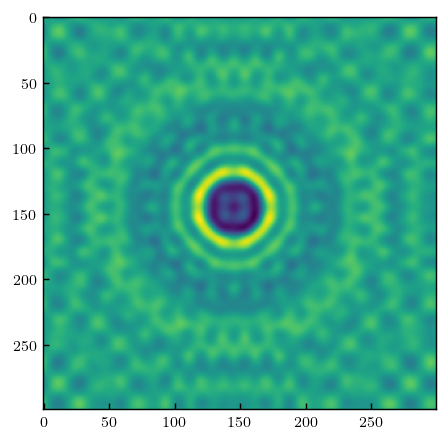

In [43]:
plt.imshow(rec_vol.imag[:,:,300])

In [44]:
np.array([0, 50, 100, 150, 200, 250, 300])*0.05

array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. ])